# Introduction to Unsupervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 13)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1) Clustering

First let's load the iris data set, which is included in `scikit-learn`, and read its description. The `iris` object below acts like a dictionary that includes tabular data along with some metadata.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**Problem 1a** Make a pair plot (a.k.a. scatter matrix, a.k.a. corner plot) showing all four features plotted against each other. You can do this any way you want, but I suggest using `pandas.plotting.scatter_matrix` or `seaborn.pairplot` instead of `corner.corner` because there are so few points.

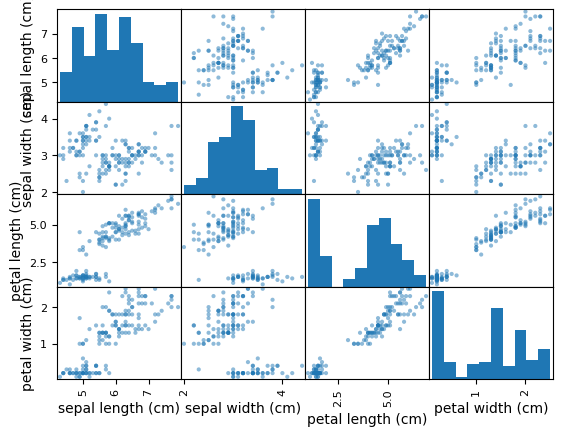

In [4]:
import pandas as pd # import
from pandas.plotting import scatter_matrix

df = pd.DataFrame(iris.data, columns=iris.feature_names)

scatter_matrix(df.iloc[:, :4])
plt.show()

**Problem 1b** Let's try to find clusters in this 4-dimensional feature space. Fit two different $K$-means models to the iris data, one with 2 clusters and one with 3 clusters. Make new pair plots but color the points by their cluster membership. According to your plots, which feature(s) is/are most correlated with the clusters? Why might that be?

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


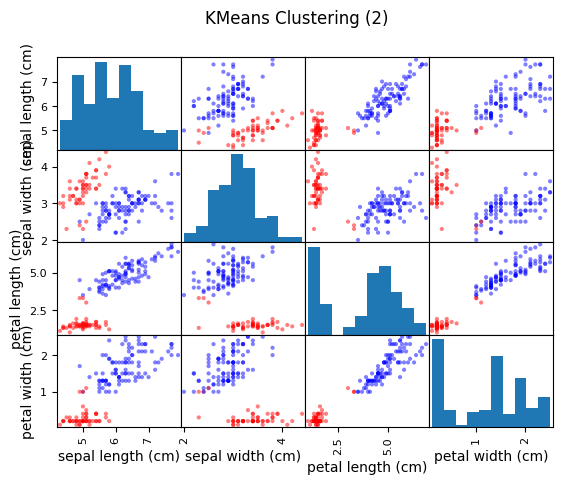

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


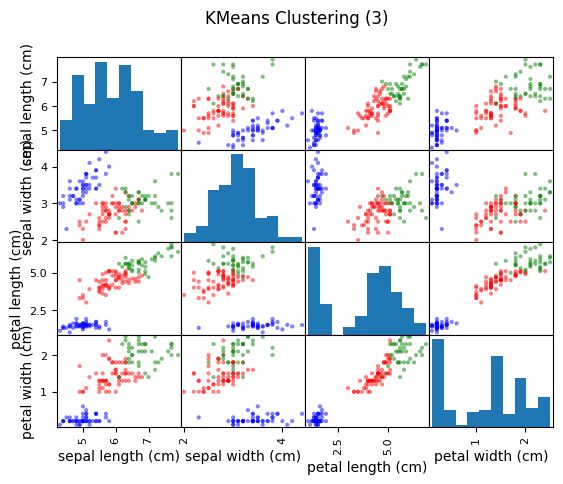

In [10]:
from sklearn.cluster import KMeans

x = iris.data
df = pd.DataFrame(x, columns=iris.feature_names)

kmeans2 = KMeans(n_clusters=2, random_state=0)  # complete
kmeans2.fit(x)  # complete
clusters2 = kmeans2.labels_ # complete
print(clusters2)

df['cluster_2'] = clusters2

color_map2 = {0: 'red', 1: 'blue'}
colors2 = df['cluster_2'].map(color_map2)

# plot
scatter_matrix(df.iloc[:, :4], color=colors2)
plt.suptitle("KMeans Clustering (2)")
plt.show()

# repeat with 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=0)
kmeans3.fit(x)
clusters3 = kmeans3.labels_
print(clusters3)

df['cluster_3'] = clusters3  # Add to DataFrame

color_map3 = {0: 'red', 1: 'blue', 2: 'green'}
colors3 = df['cluster_3'].map(color_map3)

# plot
scatter_matrix(df.iloc[:, :4], color=colors3)
plt.suptitle("KMeans Clustering (3)")
plt.show()

*Complete*

The truth is that the iris data set is fairly small and straightfoward. Nevertheless, we will now examine the clustering results after re-scaling the features. [Some algorithms are notoriously sensitive to the feature scaling, so it is important to know about this step.] Imagine you are classifying stellar light curves: the data set will include contact binaries with periods of $\sim 0.1 \; \mathrm{d}$ and Mira variables with periods of $\gg 100 \; \mathrm{d}$. Without re-scaling, this feature that covers 4 orders of magnitude may dominate all others in the final model projections.

The two most common forms of re-scaling are to rescale to a Gaussian with mean $= 0$ and variance $= 1$, or to rescale the min and max of the feature to $[0, 1]$. The best normalization is problem dependent. The [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module makes it easy to re-scale the feature set. **It is essential that the same scaling used for the training set be used for all other data run through the model.** The testing, validation, and field observations cannot be re-scaled independently. This would result in meaningless final classifications/predictions. 

**Problem 1c** Re-scale the features to normal distributions, and perform $K$-means clustering on the iris data. How do the results compare to those obtained earlier? 

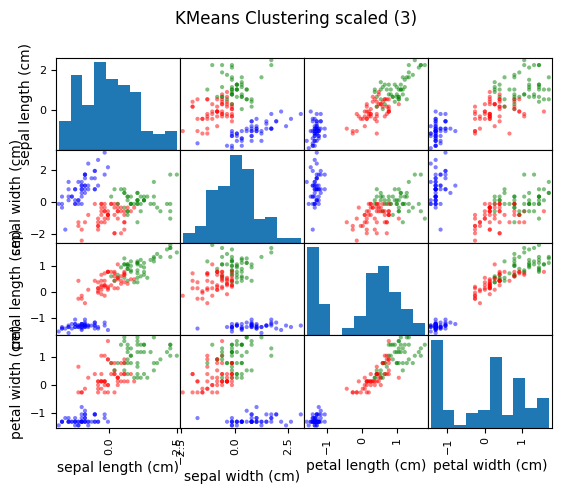

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # complete scaling
x_scaled = scaler.fit_transform(x) # complete scaling
df_scaled = pd.DataFrame(x_scaled, columns=iris.feature_names) # complete scaling

kmeans_scaled = KMeans(n_clusters=3, random_state=0) # complete clustering
kmeans_scaled.fit(x_scaled) # complete clustering
clusters_scaled = kmeans_scaled.labels_ # complete clustering

df_scaled['cluster_scaled'] = clusters_scaled
color_map_scaled = {0: 'red', 1: 'blue', 2: 'green'}
colors_scaled = df_scaled['cluster_scaled'].map(color_map_scaled)

# plot
scatter_matrix(df_scaled.iloc[:, :4], color=colors_scaled)
plt.suptitle("KMeans Clustering scaled (3)")
plt.show()

*Complete*

**Problem 2d** Let's try more complex feature engineering using principal component analysis. Find the principal components of the iris data set and cluster the data points according their projection onto the **top 2** principal components. How much of the variance do these two components capture?  
Plot the results both in the principal component space *and* in the original feature space. How do your results compare to the simpler preprocessing? Is there another benefit to using PCA?

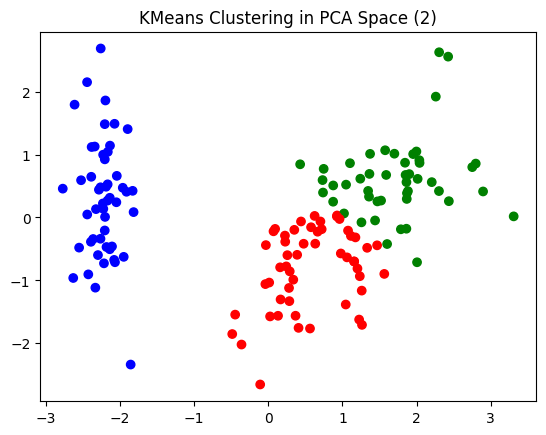

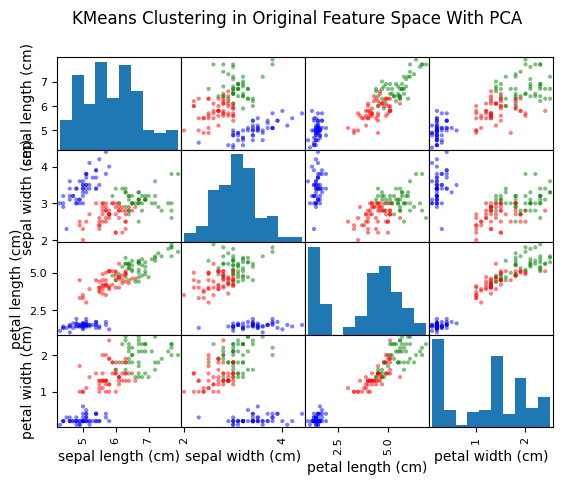

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # complete PCA
x_pca = pca.fit_transform(x_scaled) # complete PCA
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2']) # complete PCA

kmeans_pca = KMeans(n_clusters=3, random_state=0) # complete clustering
kmeans_pca.fit(x_pca) # complete clustering
clusters_pca = kmeans_pca.labels_ # complete clustering
df_pca['cluster_pca'] = clusters_pca

color_map_pca = {0: 'red', 1: 'blue', 2:'green'}
colors_pca = df_pca['cluster_pca'].map(color_map_pca)

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=colors_pca) # plot in PCA space
plt.title('KMeans Clustering in PCA Space (2)') # plot in PCA space
plt.show() # plot in PCA space

df['cluster_pca'] = clusters_pca
colors_original = df['cluster_pca'].map(color_map_pca) # plot in feature space

scatter_matrix(df.iloc[:, :4], color=colors_original)
plt.suptitle("KMeans Clustering in Original Feature Space With PCA")
plt.show()

*Complete*

**Problem 2e** Our data set might include outliers that should not belong to any of the clusters, but $K$-means will always assign points to the nearest cluster. Instead, try clustering the iris data using an algorithm called `DBSCAN`. Play around with the tuning parameters to see how they affect the final clustering results. How does the use of `DBSCAN` compare to $K$-means? Can you obtain 3 clusters with `DBSCAN`?

*Note - DBSCAN labels outliers as `-1`, so all these points will be plotted as the same color.*


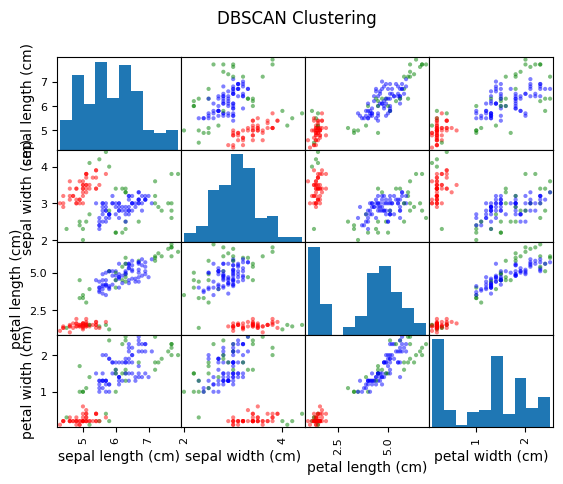

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5) # complete
dbscan.fit(x_scaled) # complete
df['dbscan_cluster'] = dbscan.labels_ # complete

unique_labels = set(dbscan.labels_)
color_list = ['red', 'blue', 'green']
color_map = {label: color_list[i % len(color_list)] for i, label in enumerate(unique_labels)}
colors_dbscan = df['dbscan_cluster'].map(color_map)

scatter_matrix(df.iloc[:, :4], color=colors_dbscan)
plt.suptitle("DBSCAN Clustering")
plt.show() # plot

*Complete*

# Problem 2) Correlation Function

Imagine we looked in the sky in a certain direction and saw a perfect circle of 50 galaxies with a radius of 1$^\circ$. This would imply highly correlated structure in the universe on the scale of $\sim 2^\circ$. Let's show this by calculating the correlation function for such a structure.

**Problem 2a** Generate the data set in question, the right ascension and declination ($x$ and $y$) for a circle of 50 galaxies centered on (0, 0) with radius $1^\circ$. Ignore spherical geometry for now and just assume everything is Euclidean for this small patch of sky.

(-4.0, 4.0)

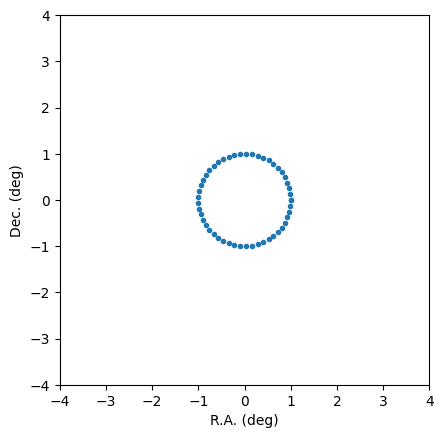

In [26]:
N = 50 # generate data
radius = 1.0 # generate data
theta = np.linspace(0, 2*np.pi, N) # generate data

xx = radius * np.cos(theta)
yy = radius * np.sin(theta)

ax = plt.axes(aspect='equal')
ax.plot(xx, yy, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)

**Problem 2b** Generate a data set of randomly distributed points over the same patch of sky. Make sure your data set is $\sim20\times$ larger than the "observed" data set above. To avoid edge effects, I suggest using $-4<x,y<4$.

(-4.0, 4.0)

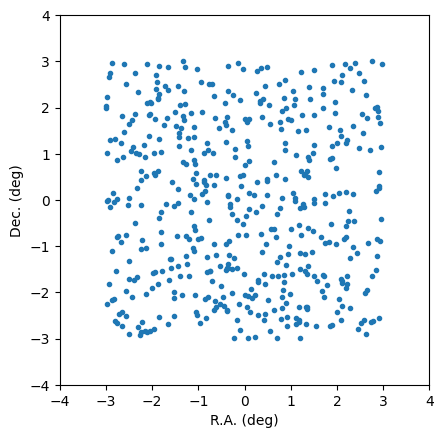

In [27]:
N_random = 500 # generate data
xr = np.random.uniform(-3, 3, N_random) # generate data
yr = np.random.uniform(-3, 3, N_random) # generate data

ax = plt.axes(aspect='equal')
ax.plot(xr, yr, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)

**Problem 2c** Calculate the distance between each pair of points in each data set. Plot histograms of each set of distances.  
*Hint:* exclude pairs matching the same point with itself.  
*Challenge:* try using broadcasting instead of loops to make each pair. 

In [ ]:
coords = np.vstack((xx, yy)).T # calculate distances
random_coords = np.vstack((xr, yr)).T # calculate distances


n_rand, bins, _ = plt.hist(  # complete
n_real, bins, _ = plt.hist(  # complete
plt.legend(loc='best')
plt.xlabel('Separation (deg)')

**Problem 2d** Estimate the two-point autocorrelation function for the real data, with the random data as a reference. Plot it as a function of separation. What did you learn about the large-scale structure in this portion of the sky?

In [ ]:
autocorr =   # complete
plt.stairs(autocorr, bins)
plt.xlabel('Separation (deg)')
plt.ylabel('Autocorrelation')

*Complete*